In [161]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

import scipy.stats as stats
from scipy import stats
from scipy.stats import kruskal
from scipy import stats

import pycorrcat.pycorrcat as corrcat  #Calcula la V de cramer para variables categóricas.

import statsmodels.api as sm

import seaborn as sns
# os.chdir('C:/Users/santiago/Documents/Proyecto AI Veeduría')
os.chdir('C:/Users/juanc/OneDrive/Escritorio/LOCAL_Personal_Veeduria')


## Descripción breve de los datos

In [ ]:
df = pd.read_csv("SECOP_I_MASTER.csv")

In [ ]:
df.head()

In [ ]:
print("Dimensiones del dataset secop I inicial: ",df.shape)

In [ ]:
df['Valor Promedio de la Sancion'].fillna(0,inplace = True) 

In [ ]:
df.info()

### Orden Entidad

In [ ]:
orden = pd.DataFrame(df["Orden Entidad"].value_counts())/len(df)
print("Porcentaje de entidades por Orden:")
print(orden)

In [ ]:
fig = plt.figure(figsize=(10,5));
pos = [2*i for i in range(1,6)]
plt.barh(pos,np.flip(orden["Orden Entidad"])/len(df),
         tick_label=np.flip(orden.index));
plt.xticks(rotation=45);
plt.title("Porcentaje de distribucion de entidades por Orden")

### Tipo de Proceso

In [ ]:
print("Porcentaje de datos por Tipo de proceso:")
df["Tipo de Proceso"].value_counts()/len(df)

### Estado del proceso

In [ ]:
print("Porcentaje de datos por Estado de proceso:")
df["Estado del Proceso"].value_counts()/len(df)

### Causal de Otras Formas de Contratacion Directa

In [ ]:
print("Porcentaje de datos Causal de Otras Formas de Contratacion Directa:")
df["Causal de Otras Formas de Contratacion Directa"].value_counts()/len(df)

### Régimen de Contratación

In [ ]:
print("Porcentaje de datos Régimen de Contratación:")
df["Regimen de Contratacion"].value_counts()/len(df)

### Objeto a Contratar

In [ ]:
print("Porcentaje de datos Objeto a Contratar:")
df["Objeto a Contratar"].value_counts()/len(df)

### Nombre grupo

In [ ]:
print("Porcentaje de datos Nombre Grupo:")
df["Nombre Grupo"].value_counts()/len(df)

### Nombre Familia

In [ ]:
print("Porcentaje de datos Nombre Familia:")
df["Nombre Familia"].value_counts(normalize = True).head(50)#/len(df)

### Nombre Clase

In [ ]:
print("Porcentaje de datos Nombre Clase:")
df["Nombre Clase"].value_counts(normalize = True).head(10)#/len(df)

### Tipo de Contrato

In [ ]:
print("Porcentaje de datos por Tipo de contrato:")
df["Tipo de Contrato"].value_counts()/len(df)

### EsPostConflicto

In [ ]:
print("Porcentaje de datos por EsPostConflicto:")
df["EsPostConflicto"].value_counts()/len(df)

### Definición del Origen de los Recursos

In [ ]:
print("Porcentaje de datos por Def Origen Recur:")
df["Def Origen Recur"].value_counts()/len(df)

### Número Origenes de los recursos

In [ ]:
print("Porcentaje de datos por Num Origenes Recur:")
df["Num Origenes Recur"].value_counts()/len(df)

### Tipo de Identificación del Contratista

In [ ]:
print("Porcentaje de datos por Tipo Identifi del Contratista:")
df["Tipo Identifi del Contratista"].value_counts()/len(df)

### Departamento y Minicipio del Contratista

In [ ]:
print("Porcentaje de datos por  Dpto y Muni Contratista:")
df["Dpto y Muni Contratista"].value_counts(normalize = True).head(20)

### Mes Firma del Contrato

In [ ]:
print("Porcentaje de datos por Mes Firma Contrato:")
df["Mes Firma Contrato"].value_counts(normalize = True)

### Día Mes Firma del Contrato

In [ ]:
print("Porcentaje de datos por Día Mes Firma Contrato:")
df["Dia del Mes Firma Contrato"].value_counts(normalize = True)

### Día de la Semana Firma del Contrato

In [ ]:
print("Porcentaje de datos por Día de la Firma Contrato:")
df["Dia de la Semana Firma Contrato"].value_counts(normalize = True)

### Plazo en dias de Ejec del Contrato

In [ ]:
print("Porcentaje de datos por Plazo en dias de Ejec del Contrato:")
df["Plazo en dias de Ejec del Contrato"].value_counts(normalize = True).head(30)

### Marc Adiciones

In [ ]:
print("Porcentaje de datos por Plazo en dias de Marc Adiciones:")
df["Marc Adiciones"].value_counts(normalize = True).head(30)

### Adicion en Valor

In [ ]:
print("Porcentaje de datos por Plazo en Adicion en Valor:")
df["Adicion en Valor"].value_counts(normalize = True)

### Adicion en Tiempo

In [ ]:
print("Porcentaje de datos por Plazo en Adicion en Tiempo:")
df["Adicion en Tiempo"].value_counts(normalize = True)

### Tiempo Adiciones (Dias)

In [ ]:
print("Porcentaje de datos por Plazo en Tiempo Adiciones (Dias):")
df["Tiempo Adiciones (Dias)"].value_counts(normalize = True).head(20)

### Nombre Sub Unidad Ejecutora

In [ ]:
print("Porcentaje de datos por Nombre Sub Unidad Ejecutora:")
df["Nombre Sub Unidad Ejecutora"].value_counts(normalize = True).head(20)

### Moneda

In [ ]:
print("Porcentaje de datos por Moneda:")
df["Moneda"].value_counts(normalize = True)

### Marcación Sanción

In [ ]:
print("Porcentaje de datos por Marc Sancion:")
df["Marc Sancion"].value_counts(normalize = True)

### Cuantía Proceso

In [ ]:
df['Cuantia Proceso'].describe().to_frame()

In [ ]:
len(df[df['Cuantia Proceso'] == 0.0])

In [ ]:
q952 = df['Cuantia Proceso'].quantile(0.95)
valor_procesos = df.loc[df['Cuantia Proceso'] < q952, 'Cuantia Proceso']

bx = sns.boxplot(y=valor_procesos);
bx.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(14,5))
ax.hist(valor_procesos, bins=50, rwidth=0.8)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.xlabel('Valor Proceso')
plt.title('Distribución de la Cuantía de los Procesos(excluyendo valores superiores al percentil 95)')

### Cuantía Contrato

In [ ]:
df['Cuantia Contrato'].describe().to_frame()

In [ ]:
len(df[df['Cuantia Contrato'] == 0.0])

In [ ]:
q952 = df['Cuantia Contrato'].quantile(0.95)
valor_contratos = df.loc[df['Cuantia Contrato'] < q952, 'Cuantia Contrato']

bx = sns.boxplot(y=valor_contratos);
bx.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(14,5))
ax.hist(valor_contratos, bins=50, rwidth=0.8)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.xlabel('Valor Proceso')
plt.title('Distribución de la Cuantía de los Contratos(excluyendo valores superiores al percentil 95)')

### Valor Total de Adiciones

In [ ]:
df['Valor Total de Adiciones'].describe().to_frame()

In [ ]:
len(df[df['Valor Total de Adiciones'] == 0.0])

In [ ]:
valor_ads['Valor Total de Adiciones'].describe().to_frame()

In [ ]:
valor_ads = df[df['Valor Total de Adiciones'] != 0.0]
q952 = valor_ads['Valor Total de Adiciones'].quantile(0.95)
ads = valor_ads.loc[valor_ads['Valor Total de Adiciones'] < q952, 'Valor Total de Adiciones']

bx = sns.boxplot(y=ads);
bx.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(14,5))
ax.hist(ads, bins=50, rwidth=0.8)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.xlabel('Valor Proceso')
plt.title('Distribución de los valores de adiciones(excluyendo valores superiores al percentil 95)')

### Valor Contrato con Adiciones

In [ ]:
df['Valor Contrato con Adiciones'].describe().to_frame()

In [ ]:
len(df[df['Valor Contrato con Adiciones'] == 0.0])

In [ ]:
q952 = df['Valor Contrato con Adiciones'].quantile(0.95)
valor_contrato_ads = df.loc[df['Valor Contrato con Adiciones'] < q952, 'Valor Contrato con Adiciones']

bx = sns.boxplot(y=valor_contrato_ads);
bx.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(14,5))
ax.hist(valor_contrato_ads, bins=50, rwidth=0.8)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.xlabel('Valor Proceso')
plt.title('Distribución de la Cuantía de los Contratos(excluyendo valores superiores al percentil 95)')

### Valor Promedio de la Sancion

In [ ]:
df['Valor Promedio de la Sancion'].isnull().value_counts()

In [ ]:
df['Valor Promedio de la Sancion'].describe().to_frame()

In [ ]:
len(df[df['Valor Promedio de la Sancion'] == 0.0])

In [ ]:
q952 = df['Valor Promedio de la Sancion'].quantile(0.70)
valor_sancion = df.loc[df['Valor Promedio de la Sancion'] < q952, 'Valor Promedio de la Sancion']

bx = sns.boxplot(y=valor_sancion);
bx.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(14,5))
ax.hist(valor_sancion, bins=50, rwidth=0.8)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.xlabel('Valor Proceso')
plt.title('Distribución de la Cuantía de los Contratos(excluyendo valores superiores al percentil 95)')

In [ ]:
pd.cut(valor_sancion, bins=50).value_counts()

----------

## Primer Filtro de Variables

Dada la primera inspección de las variables  que se consideraron,  se decide eliminar 

- Orden Entidad
- Estado del Proceso
- Nombre Familia
- Nombre Clase
- EsPostConflicto
- Nombre Sub Unidad Ejecutora
- Moneda
- Cuantía Proceso
- Valor Contrato con Adiciones

Ya sea por la falta de confiabilidad en la información ó la poca distribución que ellas consignan

Como varaibles de Identificación tenemos:

- UID
- Nombre de la Entidad
- Código de la Entidad
- Descrip Origenes Recur
- Id Adjudicación
- Identificación del Contratista
- Nombre o Razón Social del Contratista
- Fecha Firma del Contrato
- Fecha Incio Ejecución del Contrato
- Fecha Fin de Ejecución del Contrato


Variables que se quedan en el modelo

- Tipo de Proceso                                  
- Causal de Otras Formas de Contratacion Directa   
- Regimen de Contratacion                          
- Objeto a Contratar                               
- Tipo de Contrato                                 
- Nombre Grupo                                     
- Def Origen Recur                                
- Num Origenes Recur                               
- Tipo Identifi del Contratista                    
- Dpto y Muni Contratista                          
- Mes Firma Contrato                               
- Dia del Mes Firma Contrato    
- Dia de la Semana Firma de Contrato
- Plazo en dias de Ejec del Contrato                
- Marc Adiciones                                    
- Adicion en Valor                                  
- Adicion en Tiempo                                
- Tiempo Adiciones (Dias)                          
- Cuantia Contrato                                
- Valor Total de Adiciones                        
- Marc Sancion
- Valor Promedio de la Sanción


#### Definición de las varaibles categóricas

In [ ]:
dat_cat = ['Tipo de Proceso', 'Causal de Otras Formas de Contratacion Directa',
       'Regimen de Contratacion', 'Objeto a Contratar', 'Tipo de Contrato', 'Nombre Grupo', 'Def Origen Recur', 
       'Num Origenes Recur', 'Tipo Identifi del Contratista', 'Dpto y Muni Contratista', 'Mes Firma Contrato',
       'Dia del Mes Firma Contrato', 'Dia de la Semana Firma Contrato', 'Marc Adiciones', 'Adicion en Valor', 
       'Adicion en Tiempo',  'Marc Sancion']

#for i in dat_cat:
 #   df[i] = df[i].astype('category')

In [ ]:
dat_cuant = ['Cuantia Contrato', 'Valor Total de Adiciones', 'Valor Promedio de la Sancion',
             'Plazo en dias de Ejec del Contrato', 'Tiempo Adiciones (Dias)']

In [ ]:
base_secop = df[['Tipo de Proceso', 'Causal de Otras Formas de Contratacion Directa', 'Regimen de Contratacion', 
                 'Objeto a Contratar', 'Tipo de Contrato', 'Nombre Grupo', 'Def Origen Recur', 'Num Origenes Recur',
                 'Tipo Identifi del Contratista', 'Dpto y Muni Contratista', 'Mes Firma Contrato', 'Dia del Mes Firma Contrato',
                 'Dia de la Semana Firma Contrato', 'Marc Adiciones', 'Adicion en Valor', 'Adicion en Tiempo', 'Marc Sancion', 
                 'Cuantia Contrato', 'Valor Total de Adiciones', 'Valor Promedio de la Sancion',
                 'Plazo en dias de Ejec del Contrato', 'Tiempo Adiciones (Dias)']]

### Correlaciones entre variables independientes Cuantitativas

In [ ]:

sns.heatmap(base_secop[dat_cuant].corr(), annot=True)
#plt.title('Correlación entre variables explicativas numéricas y objetivo', fontsize=16)
plt.show()

## Correlaciones entre varaibles independientes categóricas usando V de Cramer

In [ ]:
bx = corrcat.corr_matrix(df, dat_cat )

### Conclusión análisis de correlaciones entre variables independientes categoricas
- Hay una correlación perfecta igual a 1 entre 'Def Origen Recur' y 'Num Origenes Recur', **nos quedamos con 'Def Origen Recur'**
- Hay una correlacion perfecta igual a 1 entre 'Nombre Grupo' y 'Objeto a Contratar', **nos quedamos con 'Nombre Grupo'**
- Hay correlaciones muy cercanas a 1 entre 'Marc Adiciones','Adiciones en Valor' y 'Adiciones en Tiempo' como es de esperarse ya que si hay una Adición en valor o tiempo registrada, se espera que Marc Sancion sea igual a 1, **descartar 'Adiciones en Valor' y 'Adiciones en Tiempo' cuando output es 'Marc Adiciones'**.
- Hay correlaciones altas (de 0.73 y 0.66 respectivamente) entre 'Regimen de Contratacion' con 'Tipo de Proceso' y 'Regimen de Contratación' con 'Causal de Otras Formas de Contratación Directa', **se dejan estas variables inicialmente y de ser necesario se dejará solo 1**
- Hay correlaciones medias (entre 0.36 y 0.45) entre variables como 'Tipo de Proceso', 'Causal de Otras Formas de Contratación','Objeto a Contratar','Tipo de Contrato' y 'Def Origen Recur'. **Todas esas variables se dejam para los modelos**.

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(bx, annot=True)

## Correlación entre variables cuantitativas y cualitativas

In [ ]:
mat_corr = []
for x,i in enumerate(dat_cat):
    row = []
    for y,j in enumerate(dat_cuant):
        cc = []
        for k in base_secop[i].unique():
            cc.append(list(base_secop[base_secop[i] == k][j]))
        cc = tuple(cc)
        row.append(stats.f_oneway(*cc)[0])
    mat_corr.append(row)

    


In [ ]:
he = pd.DataFrame(mat_corr, columns=dat_cuant)
he.set_index(pd.Series(dat_cat), inplace = True)
plt.figure(figsize=(15,7))
sns.heatmap(he, annot=True)

In [ ]:
he

## Correlaciones entre Variables independientes y Outputs

### Con Coeficiente Pearson (Variables Cuantitativas)

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(base_secop[dat_cuant+['Marc Adiciones','Adicion en Valor', 'Adicion en Tiempo', 'Marc Sancion']].corr()[['Marc Adiciones','Adicion en Valor', 'Adicion en Tiempo', 'Marc Sancion']], annot=True)
#plt.title('Correlación entre variables explicativas numéricas y objetivo', fontsize=16)
plt.show()

## Conclusion de correlaciones
- 'Marc Sancion' y 'Marc Adiciones' no tienen correlación, luego **cuando el output es 'Marc Adiciones' se puede exluir como predictor 'Marc Sancion'** 

### Con ANOVA (Variables Cuantitativas)

In [ ]:
vari = ['Marc Adiciones','Adicion en Valor', 'Adicion en Tiempo', 'Marc Sancion']
mat_corr2 = []
for x,i in enumerate(vari):
    row = []
    for y,j in enumerate(dat_cuant):
        cc = []
        for k in base_secop[i].unique():
            cc.append(list(base_secop[base_secop[i] == k][j]))
        cc = tuple(cc)
        row.append(stats.f_oneway(*cc)[0])
    mat_corr2.append(row)

    


In [ ]:
he2 = pd.DataFrame(mat_corr2, columns=dat_cuant)
he2.set_index(pd.Series(vari), inplace = True)
plt.figure(figsize=(15,7))
sns.heatmap(he2, annot=True)

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(bx[['Marc Adiciones','Adicion en Valor', 'Adicion en Tiempo', 'Marc Sancion']], annot=True)

-----------------------------------------

In [ ]:
objetos = pd.DataFrame(df["Objeto a Contratar"].value_counts())

In [ ]:
dic_obj = dict()
cods_obj = range(1,len(objetos)+1)
for k in cods_obj:
    dic_obj[k] = objetos.index[k-1]
dic_obj

In [ ]:
fig = plt.figure(figsize=(15,7));
pos = [3*i for i in range(1,len(objetos)+1)]
plt.bar(pos,objetos["Objeto a Contratar"]/len(df),
         tick_label=cods_obj);
plt.title("Porcentaje de distribucion de Objetos a Contratar");
plt.xlabel("Codigo de objeto de compra");
plt.ylabel("Porcentaje de valores");

## Identificación y preprocesamiento de variables
- Las variables *Orden Entidad, Tipo de Proceso, Estado de Proceso, Regimen de Contratacion, Objeto a Contratar, Tipo de Contrato* y *Origen de los Recursos* son **variables categóricas** con información textual.

- Las variables *Cuantia Contrato, Tiempo Adiciones en Dias, Tiempo Adiciones en Meses, Valor Total de Adiciones, Valor Sancion* son **variables numéricas** de la base de datos.

- Las variables *Marc Adiciones* y *Marc Sancion* son **outputs de interés**. Puede que **Marc Adiciones** también sea input y la única variable de salida de los modelos sea *Marc Sancion*.

- Se creará una sola columna que indique el tiempo en adiciones en días:
    - Si *Rango Ejec del Contrato* en días (D) entonces se usa ese valor
    - Si *Rango Ejec del Contrato* en días (M) entonces, asumiendo que cada día sea de 30 meses se calcula $30m + d$ donde $m$ es el tiempo adicionado en meses y $d$ el tiempo adicionado en días

In [ ]:
# Usar OneHotEncoder
cat_cols = ["Orden Entidad","Tipo de Proceso","Estado del Proceso",
           "Regimen de Contratacion","Objeto a Contratar","Tipo de Contrato",
           "Origen de los Recursos"]
print("Numero de Nans por columna:")
print([(cat_cols[i], df[cat_cols[i]].isna().sum()) for i in range(len(cat_cols))])
#enc = preprocessing.OneHotEncoder(handle_unknown="ignore")
#enc.fit(df[])

In [ ]:
#null_rows = df.index[pd.isnull(df["Regimen de Contratacion"])]
#df.iloc[null_rows,:]
df[pd.isnull(df["Regimen de Contratacion"])]

Se pueden descartar esas filas ya que son muy pocas y no tienen información relevante.

In [ ]:
df = df[~pd.isnull(df["Regimen de Contratacion"])]

# Modelos
Los  modelos de clasificación que se probarán son:
1. K-Nearest Neighbors
2. Modelos Bayesianos
3. SVM

Cada uno de estos modelos se probará utilizando como inputs y outputs las variables de la siguiente manera:
1. **Inputs**: categóricas (textuales), Marc Adiciones y variables numéricas, **Output**: Marc Sancion
2. **Inputs**: categóricas (textuales), variables numéricas, **Output**: Marc Sancion
3. **Inputs**: categóricas (textuales), variables numéricas, **Output**: Marc Adiciones

**Nota:** hay que manejar con cuidado el desbalance de las proporciones de los datos, de lo contrario los modelos quedan sesgados

In [ ]:
df.columns

---
# Análisis de correlaciones entre Inputs y Output
## Ayudas
- Test chi cuadrado
- Cramers'V
- Bonferroni Correction

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Columnas con texto categoricas
# ['Orden Entidad','Tipo de Proceso','Estado del Proceso','Regimen de Contratacion','Objeto a Contratar','Tipo de Contrato','Origen de los Recursos']
#Transformación de texto a codigos con OneHotencoder
enc = OneHotEncoder()
enc.fit(df[cat_cols])
# enc.categories: arreglo con nombre de categorias porcolumna

In [ ]:
# Diccionario de diccionarios de codigos para cada columna categorica
dic_cods = dict()
for i in range(len(enc.categories_)):
    d = dict()
    for j in range(len(enc.categories_[i])):
        d[enc.categories_[i][j]] = j
    dic_cods[cat_cols[i]] = d

In [ ]:
from copy import deepcopy

In [ ]:
# Reemplazando texto por codigos
df_cod = deepcopy(df)
for name in cat_cols:
    df_cod = df_cod.replace({name:dic_cods[name]})

In [ ]:
# df_cod es el mismo dataset pero con las variables categoricas codificadas
df_cod.head()

# Remuestreo para balancear clases

In [ ]:
df_0 = df[df["Marc Sancion"]==0].sample(n=5000,replace=True,random_state=0)
df_1 = df[df["Marc Sancion"]==1].sample(n=5000,replace=True,random_state=0)

df_sample = pd.concat([df_0,df_1],axis=0)

df_sample = df_sample.sample(frac=1).reset_index(drop=True)

# 1. Inputs textuales + Marc_sancion, output: Marc Sancion

## 1.1 Análisis de correlación inputs categóricos y output Marc Sancion categorico
La correlación entre dos variables categóricas se puede medir con las siguientes técnicas: **test chi cuadrado, Cramers's V**.\
Primero analicemos analicemos con el test de Chi cuadrado.

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
def chi2_test(var1,var2,prob=0.95):
    """
    Determina si 2 variables categoricas tienen algún tipo de correlacion con test de chi cuadrado
    args:
        var1: variable 1
        var2: variable 2
        prob: nivel de confianza para test, por defecto 95%
    returns:
        metricas de test
    """
    table = pd.crosstab(var1,var2)
    # Estadistico cho2, p-valor, grados de libertad estimados y frecuencias estimadas
    # basado en sumas marginales de la tabla
    stat,p,dof,expected = chi2_contingency(table)
    print("Degrees of freedom (Dof): ", dof)
    #print(expected)
    #prob = 0.95
    # Percent point function, inverse distribution function
    # Calcula probabilidad que la variable sea menor o igual que x dado un x
    # interpret statistic
    critical=chi2.ppf(prob,dof)
    print("Probability = %.3f, critical = %.3f, stat = %.3f" % (prob,critical,stat))
    if abs(stat) >=critical:
        print("Dependent (reject H0)")
    else:
        print("Independent (fail to reject H0)")
    # interpet p-value
    alpha = 1.0-prob
    print("Significance = %.3f, p-value = %.3f" % (alpha,p))
    if p <=alpha:
        print("Dependent (reject H0)")
    else:
        print("Independent (fail to reject H0)")

### Entre Orden Entidad y Marc Sancion

In [ ]:
col1 = "Orden Entidad"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [ ]:
table = pd.crosstab(df["Orden Entidad"],df["Marc Sancion"])
table

In [ ]:
chi2_test(df_sample["Orden Entidad"],df_sample["Marc Sancion"],prob=0.95)

### Entre tipo de Proceso y Marc Sancion

In [ ]:
col1 = "Tipo de Proceso"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [ ]:
table = pd.crosstab(df_sample["Tipo de Proceso"],df_sample["Marc Sancion"])
chi2_test(df_sample["Tipo de Proceso"],df_sample["Marc Sancion"],prob=0.95)

## Entre Estado del Proceso y Marc Sancion

In [ ]:
col1 = "Estado del Proceso"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [ ]:
chi2_test(df_sample["Estado del Proceso"],df_sample["Marc Sancion"],prob=0.95)

## Entre Regimen de Contratacion y Marc Sancion

In [ ]:
col1 = "Regimen de Contratacion"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [ ]:
chi2_test(df_sample["Regimen de Contratacion"],df_sample["Marc Sancion"],prob=0.95)

## Entre Objeto a Contratar y Marc Sancion 

In [ ]:
len(df_sample["Objeto a Contratar"].value_counts())

In [ ]:
col1 = "Objeto a Contratar"
col2 = "Marc Sancion"
tab_norm = pd.crosstab(df_sample[col1],df_sample[col2],normalize=True)
fig = plt.figure(figsize=(20,13))
sns.heatmap(tab_norm.iloc[:int(len(tab_norm)/2.0),:],annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2 + " (parte 1)");

In [ ]:
fig = plt.figure(figsize=(20,13))
sns.heatmap(tab_norm.iloc[int(len(tab_norm)/2.0):,:],annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2 + " (parte 2)");

In [ ]:
chi2_test(df_sample["Objeto a Contratar"],df_sample["Marc Sancion"],prob=0.95)

## Entre Tipo de Contrato y Marc Sancion

In [ ]:
col1 = "Tipo de Contrato"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [ ]:
chi2_test(df_sample["Tipo de Contrato"],df_sample["Marc Sancion"],prob=0.95)

## Entre Origen de los Recursos y Marc Sancion

In [ ]:
col1 = "Origen de los Recursos"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [ ]:
chi2_test(df_sample["Origen de los Recursos"],df_sample["Marc Sancion"],prob=0.95)

## Entre Marc Adicion y Marc Sancion

In [ ]:
col1 = "Marc Adiciones"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [ ]:
chi2_test(df_sample["Marc Adiciones"],df_sample["Marc Sancion"],prob=0.95)

## Entre Variables numéricas y Marc Sancion
Las variables numéricas son *Cuantia Contrato, Valor Total de Adiciones* y una nueva variable llamada *Adiciones en Dias*. Esta última representa el timepo adicionado en días, construida a partir de *Rango de Ejec del Contrato* asumiendo que si *Rango de Ejec del Contrato* es M entonces la cada se suma *Tiempo Adiciones en Meses* $\times$ 30 a *Tiempo Adiciones en Dias*.

La correlación entre variables numéricas y una variable categórica se puede calcular con la **correlación de punto biserial**.
Las hipótesis para esta correlación son iguales a cualquier test de correlación:
- **La hipótesis nula $H_0$ es que  no hay una correlación significativa entre las variables**. 
- Si el p-valor es menor que el nivel de significancia $\alpha$ (en general de 0.05) se rechaza la hipótesis nula. Más info [aquí](https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8#:~:text=A%20p%2Dvalue%20is%20the,sample%20occurred%20due%20to%20chance.).

## Entre Cuantia Contrato y Marc Sancion

In [ ]:
from scipy import stats

In [ ]:
# stats.pointbiserialr(a, b): retorna el coeficiente de correlación y el p-valor
# a: variable binaria, b: variable continua
stats.pointbiserialr(df_sample["Marc Sancion"], df_sample["Cuantia Contrato"])

In [ ]:
y0 = df_0["Cuantia Contrato"].mean()
y1 = df_1["Cuantia Contrato"].mean()
plt.scatter(df_sample["Marc Sancion"], df_sample["Cuantia Contrato"]);
plt.plot([0,1],[y0,y1],'r');

## Entre Valor total de las adiciones y Marc Sancion

In [ ]:
stats.pointbiserialr(df_sample["Marc Sancion"], df_sample["Valor Total de Adiciones"])

In [ ]:
y0 = df_0["Valor Total de Adiciones"].mean()
y1 = df_1["Valor Total de Adiciones"].mean()
plt.scatter(df_sample["Marc Sancion"], df_sample["Valor Total de Adiciones"]);
plt.plot([0,1],[y0,y1],'r');

## Entre Adiciones en dias y Marc Sancion

In [ ]:
dias = np.zeros(len(df_sample))
for i in range(len(df_sample)):
    if df_sample["Rango de Ejec del Contrato"][i] == "M":
        dias[i] = 30*df_sample["Tiempo Adiciones en Meses"][i] + df_sample["Tiempo Adiciones en Dias"][i]
    else:
        dias[i] = df_sample["Tiempo Adiciones en Dias"][i]
df_sample["Adiciones en Dias"] = dias

In [ ]:
stats.pointbiserialr(df_sample["Marc Sancion"], df_sample["Adiciones en Dias"])

## Conclusiones para variables categóricas:
- Por ahora, se descarta *Orden Entidad*
- Validar listados de entidades de orden Nacional Centralizado,..., con valores pequeños según crosstab
- Considerar modelos  **sin** Prestación de servicios
- Descartar *Estado del Proceso*
- Calcular probabilidades condicioneales con tabla de *Marc Adiciones* y *Marc Sancion*
- Calcular porcentajes de Adición con respecto a *Cuantia Contrato*, el output es *Marc Sancion*.
- **Modelos a probar: regresión logística, árbol de desición**
- Considerar tiempos de aducuibes cuando output es *Marc Sancion*
- Utilizar **Random Forest** para selección de predictores

**Nota:** hacer corrstabs como graficas de barras

## Regresión logística
Primero creamos variables categóricas con dummies (1 y 0).

In [ ]:
# cat_vars = ['Orden Entidad','Tipo de Proceso','Estado del Proceso','Regimen de Contratacion','Objeto a Contratar','Tipo de Contrato','Origen de los Recursos', "Marc Adiciones"]
cat_vars = ['Orden Entidad','Tipo de Proceso','Estado del Proceso','Regimen de Contratacion',
            'Objeto a Contratar','Tipo de Contrato','Origen de los Recursos']
df_cat = pd.DataFrame()
for var in cat_vars:
    df_dum = pd.get_dummies(df[var])
    # Diccionario para cambiar nombres
    dic_new_names = dict()
    for cat in df_dum.columns:
        dic_new_names[cat] = str(var)+"_"+str(cat)
    # Aclarando nombre de variables categoricas
    df_dum = df_dum.rename(columns=dic_new_names)
    # Se pega el dataframe de dummies
    df_cat = pd.concat([df_cat,df_dum],axis=1)

Ahora *df_cat* es un data frame con las variables categóricas por dummies

In [ ]:
# Creacion de variable Adiciones en Dias para el dataframe principal
dias = np.zeros(len(df))
for i in range(len(df)):
    # Casos en los que se detiene
    if i in {123225,410080,472437,492844}:
        dias[i] = 0
    elif df["Rango de Ejec del Contrato"][i] == "M":
        dias[i] = 30*df["Tiempo Adiciones en Meses"][i] + df["Tiempo Adiciones en Dias"][i]
    elif df["Rango de Ejec del Contrato"][i] == "D":
        dias[i] = df["Tiempo Adiciones en Dias"][i]
df["Adiciones en Dias"] = dias

In [ ]:
# Pegamos las variables numéricas con df_cat
df_cat = pd.concat([df_cat,df[["Cuantia Contrato", "Valor Total de Adiciones",
                               "Adiciones en Dias","Marc Sancion", "Marc Adiciones"]]],axis=1)

In [ ]:
list(df_cat.columns)

In [ ]:
print(df_cat["Marc Sancion"].value_counts())
print(df_cat.shape)

In [ ]:
# Balanceo de clases se puede hacer con SMOTE en python
# Por ahora, se elige  muestrea 5000 datos de la clase 0 y remuestrea 5000 de la clase 1
df_cat_0 = df_cat[df_cat["Marc Sancion"]==0].sample(n=5000,replace=True,random_state=0)
df_cat_1 = df_cat[df_cat["Marc Sancion"]==1].sample(n=5000,replace=True,random_state=0)

df_cat_sample = pd.concat([df_cat_0,df_cat_1],axis=0)

df_cat_sample = df_cat_sample.sample(frac=1).reset_index(drop=True)

## Selección de variables con Recursive Feature Extraction (RFE)
Esta técnica selecciona variables considerando conjuntos cada vez más pequeños de variables, inicialmente se entrena con el conjunto de datos inicial. A medida que itera, descarta las variables menos importantes.

In [ ]:
X = df_cat_sample.loc[:,[n for n in df_cat_sample.columns  if n!= "Marc Sancion"]]
y = df_cat_sample["Marc Sancion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
list(X.columns)

In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select = 30)
rfe = rfe.fit(X,y)

In [ ]:
#list(df_cat_sample.columns[rfe.support_.reshape(30)])
best_cols_idx = np.where(rfe.support_ == True)
best_cols = df_cat_sample.columns[best_cols_idx]
best_cols = [c for c in best_cols if c != "Marc Sancion"]

In [ ]:
best_cols

In [ ]:
# Con las variables seleccionadas
X = df_cat_sample[best_cols]
y = df_cat_sample["Marc Sancion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs',maxiter=200)
print(result.summary2())

In [ ]:
from sklearn import metrics

In [ ]:
print(y_train.value_counts())
print("-------------")
print(y_test.value_counts())

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
def plotCM(ytrue, ypred, titulo, clases=None, normalize = False, ax = None):
    """ Funcion para calcular y visualizar la matriz de confusion"""
    
    if clases == None:
        clases = list(set(ytrue))
        clases.sort() # etiquetas unicas ordenadas alfabeticamente
    
    CM = confusion_matrix(ytrue,ypred, labels=clases)
    
    #Normaliza la matriz de confusion dividiendo cada fila por el total de verdaderos
    if normalize:
        CM = 100*CM / CM.sum(axis=1).reshape(-1,1) #Aprovechando el Broadcasting!
 
    df = pd.DataFrame(CM, index=clases, columns=clases)
    df.index.name = 'True'; df.columns.name = 'Predicted'
    
    sns.heatmap( df, # Visualizando la matriz de confusion
             annot=True, fmt='2.1f', cmap='ocean_r',cbar=False,square=True, annot_kws={'fontsize':16}, ax=ax )
    plt.title(titulo)
    plt.show()

In [ ]:
plotCM(y_test,y_pred,"Matriz de confusion (1: con sancion, 0:sin sancion)",
      normalize=True)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# Grafica ROC AUC
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Validación cruzada:
logreg = LogisticRegression()
cv_scores = cross_val_score(logreg,X_train,y_train,cv=5)
cv_scores

## Selección de variables con conclusiones iniciales y quitando Contrato por prestacion de servicios

In [ ]:
list(df_cat.columns)

In [ ]:
# Sin Orden Entidad, sin Tipo de Contrato_ Prestación de Servicios
cols = [n for n in df_cat.columns if "Orden Entidad" not in n]
df2 = df_cat[cols]
df2 = df2[df2['Tipo de Contrato_Prestación de Servicios'] == 0]
print(df2.shape)
print(df2["Marc Sancion"].value_counts())

In [ ]:
# Balanceando clases
df2_0 = df2[df2["Marc Sancion"]==0].sample(n=5000,replace=True,random_state=0)
df2_1 = df[df_cat["Marc Sancion"]==1].sample(n=5000,replace=True,random_state=0)

df2_sample = pd.concat([df2_0,df2_1],axis=0)

df2_sample = df_cat_sample.sample(frac=1).reset_index(drop=True)

In [ ]:
X = df2_sample.loc[:,[n for n in df2_sample.columns if n != "Marc Sancion"]]
y = df2_sample["Marc Sancion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
plotCM(y_test,y_pred,"Matriz de confusion sin Cont. Prestacion de servicios \n (1: con sancion, 0:sin sancion)",
      normalize=True)

In [ ]:
# Grafica ROC AUC
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Validación cruzada:
logreg = LogisticRegression()
cv_scores = cross_val_score(logreg,X_train,y_train,cv=5)
cv_scores

---

# Modelos para detectar contratos con adiciones - SECOP I
En este notebook se realiza la prueba de posibles modelos predictivos con los cuales se pretende detectar anomalías en la contratación pública de Bogotá. Se usa como insumo la base de datos SECOP_I_MASTER2.

Base con la cual se proceden a realizar modelos de clasificación binarios para 3 diferentes variables objetivo que determinan si el contrato tuvo alguna adición del respectivo tipo o no; `Marc Adiciones`,`Adiciones en Valor` y `Adiciones en Valor`. Adicionalmente, se realizan modelos con y sin incluir los modelos con prestacion de servicios.

**Implementación de modelos después de análisis exploratorio y de selección de variables**

- Buscar útilidad de AIC Y BIC para modelos de clasificación y su calculo.https://stackoverflow.com/questions/48185090/how-to-get-the-log-likelihood-for-a-logistic-regression-model-in-sklearn
- Probar elección de hiperparámetros con métrica fbeta.
- Balancear hacia arriba los datos para modelos de contratos diferentes a prestación de servicio debido al bajo número de observaciones.
- Paper Jorge y Juan David revisar consistencia.
- Visualizar arbol de decisión sencillo.
- Segunda versión del reporte 2, incluye sección de EDA y modelos implementados en sección 4. También solucionar 

# Funciones auxiliares

In [162]:
# Gráficas
def corr_Matrix(data):
    '''
    Gráfica la matríz de correlación entre todas las variables 
    de la base de datos usada.
    '''
    f,ax = plt.subplots(figsize = (15,14))
    sns.heatmap(data.corr(),cmap = 'ocean_r', annot = True, cbar = False )
    ax.set_title('Correlation matrix')
    plt.show()


def plot_ROC(model, X_test, y_test, scaler, model_name='Model'):
    '''
    Gráfica la curva ROC y calcula el AUC para un modelo entrenado dados unos datos de prueba.
    Entradas:
            model: modelo sklearn entrenado del que se usa el método predict_proba()
            X_test: variables independientes de prueba.
            Y_test: variable dependiente de prueba.
            scaler: objeto preprocessing.StandardScaler() entrenado junto al modelo para escalar X_test.
            model_name: string con el nombre del modelo que se pasa para usar como leyenda de la curva ROC
    Salida:
            Gráfica curva ROC e impresión del AUC.
    '''
    ns_probs = [0 for _ in range(len(y_test))]
    lr_probs = model.predict_proba(scaler.transform(X_test))
    lr_probs = lr_probs[:, 1]
    
    lr_auc = roc_auc_score(y_test, lr_probs)
    print("Model: ROC AUC = {:1.3f}".format(lr_auc))

    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    plt.plot(ns_fpr, ns_tpr, linestyle = '--') 
    plt.plot(lr_fpr, lr_tpr, marker = '.', label = model_name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('ROC curve')
    plt.show()
    
    
def plot_CM(y_true, y_pred,norm=None):
    '''
    Tabla de matríz de confusión
    '''
    cm = confusion_matrix(y_true, y_pred,normalize=norm)
    cm_df = pd.DataFrame(cm, index = ['No','Sí'], columns = ['No','Sí'])
    cm_df.index.name = 'True'; cm_df.columns.name = 'Predicted'
    return cm_df

def balance(base, target):
    '''
    Función para balancear las bases de datos hacia el valor de la variables objetivo con menos observaciones.
    Entradas:
            base: base de pandas a balancear.
            target: nombre de la variable objetivo respecto a la que se balanceará.
    Salida:
            df_downsample: base balanceada.
    '''
    df_majority = base[base[target] == 0]
    df_minority = base[base[target] == 1]
    
    n = min(base[target].value_counts())
    df_majority_downsampled = resample(df_majority, replace = False, n_samples = n, random_state = 123)
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])
    
    return df_downsampled

In [163]:
# Funciones para ejecutar modelos
def feature_selection(X, y,max_vars):
    '''
    Selección de variables estadísticamente significativas mediante random forest
    Entradas: X, y: Variables independietes y dependientes como base y serie de pandas respectivamente.
    Salida: X_varSelec: Pandas dataframe solo con las variables significativas.
    '''
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 100),max_features = max_vars)
    sel.fit(X, y)
    
    variables_significativas = np.where(sel.get_support() == True)
    nombres_columnas = []
    for idx, i in enumerate(variables_significativas):
        nombres_columnas.append(X.columns[i])
    nombres_columnas = list(nombres_columnas[0])
    print("Variables estadísticamente significativas: \n{}".format(nombres_columnas))
    
    X_varSelec = sel.transform(X)
    X_varSelec = pd.DataFrame(X_varSelec, columns = nombres_columnas)
    
    return X_varSelec


def reg_log(X, y):
    '''
    Modelo de regresión logítica.
    Función para la realización de modelos mediante regresión logística. Imprime accuracy de la validación cruzada
    y datos de prueba , así como el recall en los datos de prueba.
    Entradas: 
            X: base de pandas con variables independientes.
            Y: serie de pandas con la variable objetivo.
    Salidas:
            rl: modelo de regresión logística entrenado.
            X_test, y_test: Datos de prueba.
            y_pred: valores de la variable respuesta estimados.
            scaler: objeto para escalar valores entrenado.
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    
    rl = LogisticRegression(max_iter = 500)
    vc = cross_val_score(rl, scaler.transform(X_train), y_train, cv = 10, scoring = "accuracy")
    accuracy = vc.mean()
    print("Accuracy para Regresión Logística con validación cruzada: {:1.4f} ".format(accuracy) )
    
    rl = LogisticRegression(max_iter = 500)
    rl.fit(scaler.transform(X_train), y_train)

    y_pred = rl.predict(scaler.transform(X_test))
    print("El accuracy del test es: {:1.4f}".format( accuracy_score(y_test, y_pred) ))
    print("La sensitividad(recall) del test es: {:1.4f}".format( recall_score(y_test, y_pred) ))
    
    return rl, X_test, y_test, y_pred, scaler


def random_forest(X, y):
    '''
    Modelo random forest para clasificación.
    Entradas: 
            X: base de pandas con variables independientes.
            Y: serie de pandas con la variable objetivo.
    Salidas:
            arb: modelo de random forest entrenado.
            X_test, y_test: Datos de prueba.
            y_pred: valores de la variable respuesta estimados.
            scaler: objeto para escalar valores entrenado.    
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    
    arb = RandomForestClassifier(random_state=42)
    arb.fit(scaler.transform(X_train), y_train)
    
    y_pred_arb = arb.predict(scaler.transform(X_test))
    print("Accuracy del test: {:1.4f}".format( accuracy_score(y_test, y_pred_arb) ))
    print("La sensitividad(recall) del test es: {:1.4f}".format( recall_score(y_test, y_pred_arb) ))

    return arb, X_test, y_test, y_pred_arb, scaler

In [164]:
# tarda un poco en leer los datos
df = pd.read_csv("SECOP_I_MASTER2.csv")
df = df.dropna()

In [165]:
cols_ad = [n for n in df.columns if "Adicion" in n or "adicion" in n]
cols_ad

['Marc Adiciones',
 'Adicion en Valor',
 'Adicion en Tiempo',
 'Tiempo Adiciones (Dias)',
 'Valor Total de Adiciones',
 'Valor Contrato con Adiciones']

In [166]:
print("Dimension de los datos: ",df.shape)
df.columns

Dimension de los datos:  (603450, 49)


Index(['UID', 'Orden Entidad', 'Nombre de la Entidad', 'Código de la Entidad',
       'Tipo de Proceso', 'Estado del Proceso',
       'Causal de Otras Formas de Contratacion Directa',
       'Regimen de Contratacion', 'Objeto a Contratar', 'Tipo de Contrato',
       'cantidad de palabras objeto a contratar', 'Nombre Grupo',
       'Nombre Familia', 'Nombre Clase', 'EsPostConflicto', 'Def Origen Recur',
       'Num Origenes Recur', 'Descrip Origenes Recur', 'ID Ajudicacion',
       'Tipo Identifi del Contratista',
       'cantidad de palabras objeto del contrato a la Firma',
       'mismo detalle objeto a contratar despues de firma',
       'Identificacion del Contratista', 'Nom Raz Social Contratista',
       'Dpto y Muni Contratista', 'Fecha de Cargue en el SECOP',
       'Fecha de Firma del Contrato', 'Fecha Ini Ejec Contrato',
       'Fecha Firma Contrato - Fecha Cargue Secop',
       'Fecha Ini Ejec - Fecha Firma Contrato', 'Mes Firma Contrato',
       'Dia del Mes Firma Contrato',

## Identificación de Variables 

In [167]:
#Variables a excluir al momento de entrenar modelos
vars_a_excluir = ["Orden Entidad","Estado del Proceso", "Nombre Familia",
                  "Nombre Clase","Nombre Sub Unidad Ejecutora","Moneda","Cuantia Proceso",
                  "Valor Contrato con Adiciones","Objeto a Contratar","Num Origenes Recur",
                 ]
# Variables que no son utiles para modelos
vars_a_excluir += ["UID","Nombre de la Entidad","Código de la Entidad","Descrip Origenes Recur",
                      "ID Ajudicacion","Tipo Identifi del Contratista","Identificacion del Contratista",
                     "Nom Raz Social Contratista","Fecha de Cargue en el SECOP","Fecha de Firma del Contrato",
                     "Fecha Ini Ejec Contrato","Fecha Ini Ejec Contrato","Fecha Fin Ejec Contrato"
                     ,'Ultima Actualizacion']
# vars_cinluidas contiene los target
vars_incluidas = [name for name in df.columns if name not in vars_a_excluir]
# Marc Sancion como input es exluido
vars_categoricas = ["Tipo de Proceso","Causal de Otras Formas de Contratacion Directa","Regimen de Contratacion",
                    "Tipo de Contrato","Nombre Grupo","EsPostConflicto","Def Origen Recur",
                    "mismo detalle objeto a contratar despues de firma","Dpto y Muni Contratista","Mes Firma Contrato",
                   "Dia del Mes Firma Contrato","Dia de la Semana Firma Contrato","Marc Adiciones",]

### Dudas
- Las variables en formato fecha fueron incluidas como inputs en el modelo?
-  EsPostConflicto el desbalance es enorme, dejarla?
-  Diccionario de variables que quedaron en SECOP_1_MASTER2
- Departamento de Contratista hay unos pocos que vienen de municipios externos a Bogotá y Cundinamarca, dejarlos?
- Tiempo Adiciones (Dias) tiene datos negativos

In [168]:
print("Para Marc Adiciones:")
print(df["Marc Adiciones"].value_counts(),"\n \n")
print("Para Adicion en Valor:")
print(df["Adicion en Valor"].value_counts(),"\n \n")
print("Para Adicion en Tiempo:")
print(df["Adicion en Tiempo"].value_counts(),"\n \n")

Para Marc Adiciones:
0    451492
1    151958
Name: Marc Adiciones, dtype: int64 
 

Para Adicion en Valor:
0    461486
1    141964
Name: Adicion en Valor, dtype: int64 
 

Para Adicion en Tiempo:
0    460338
1    143112
Name: Adicion en Tiempo, dtype: int64 
 



Aunque el desbalance no es tan drástico como con `Marc Sancion` sí se mantiene un desbalance de 3 a 1 aproximadamente siendo la categroría 1 la menos presente para los 3 outputs. Por lo tanto, para cada output de adición se hará un downsampling de la clase 0 mientras que se mantiene intacta la cantidad de datos de la clase 1.

# Modelos con output `Marc Adiciones`
- Se exluye la informacion acerca de adiciones excepto el target 'Marc Adiciones'.
- Se **excluye la información acerca de sanciones, es decir 'Marc Sancion y Valor Sancion'**

In [169]:
# _MA: para Marc Adiciones
df_downsampled_MA = balance(df,"Marc Adiciones")
y_down_MA = df_downsampled_MA["Marc Adiciones"]
# Eliminamos las columnas innecesarias incluyendo la del target
X_down_MA = df_downsampled_MA.drop(columns = vars_a_excluir + ["Marc Adiciones","Adicion en Valor","Adicion en Tiempo",
                                                               "Marc Sancion","Valor Total de Adiciones"])
# Pasamos a dummies las columnas que sean categoricas
X_down_MA = pd.get_dummies(data = X_down_MA, columns=list(set(vars_categoricas) - {"Marc Adiciones","Marc Sancion"}))

In [170]:
# No esta quitando Valor Sancion :(
# Variables dummies
list(X_down_MA.columns)

['cantidad de palabras objeto a contratar',
 'cantidad de palabras objeto del contrato a la Firma',
 'Fecha Firma Contrato - Fecha Cargue Secop',
 'Fecha Ini Ejec - Fecha Firma Contrato',
 'Plazo en dias de Ejec del Contrato',
 'Tiempo Adiciones (Dias)',
 'Cuantia Contrato',
 'Valor Sancion',
 'Ultima Actualizacion - Fecha Fin Ejec Contrato',
 'Tipo de Proceso_Asociación Público Privada',
 'Tipo de Proceso_Concurso de Méritos Abierto',
 'Tipo de Proceso_Concurso de Méritos con Lista Corta',
 'Tipo de Proceso_Contratación Directa (Ley 1150 de 2007)',
 'Tipo de Proceso_Contratación Mínima Cuantía',
 'Tipo de Proceso_Contratos y convenios con más de dos partes',
 'Tipo de Proceso_Licitación Pública',
 'Tipo de Proceso_Licitación obra pública',
 'Tipo de Proceso_Régimen Especial',
 'Tipo de Proceso_Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)',
 'Tipo de Proceso_Selección Abreviada del literal h del numeral 2 del artículo 2 de la Ley 1150 de 2007',
 'Tipo de Proceso_Selección Ab

## Seleccion de las variables mas importantes con Random Forest

In [171]:
print("Dimension de dataset con dumies: ",X_down_MA.shape)
print("Cantidad de variables en dataset con dummies: ",X_down_MA.shape[1])

Dimension de dataset con dumies:  (303916, 209)
Cantidad de variables en dataset con dummies:  209


In [173]:
max_vars = 30
X_fselec = feature_selection(X_down_MA, y_down_MA, max_vars)

Variables estadísticamente significativas: 
['cantidad de palabras objeto a contratar', 'cantidad de palabras objeto del contrato a la Firma', 'Fecha Firma Contrato - Fecha Cargue Secop', 'Fecha Ini Ejec - Fecha Firma Contrato', 'Plazo en dias de Ejec del Contrato', 'Tiempo Adiciones (Dias)', 'Cuantia Contrato', 'Ultima Actualizacion - Fecha Fin Ejec Contrato', 'Tipo de Proceso_Régimen Especial', 'Dia del Mes Firma Contrato_1']


Entre las variables seleccionadas, las variables más correlacionadas son `cantidad de palabras objeto a contratar` y `cantidad de palabras objeto del contrato a la firma`.

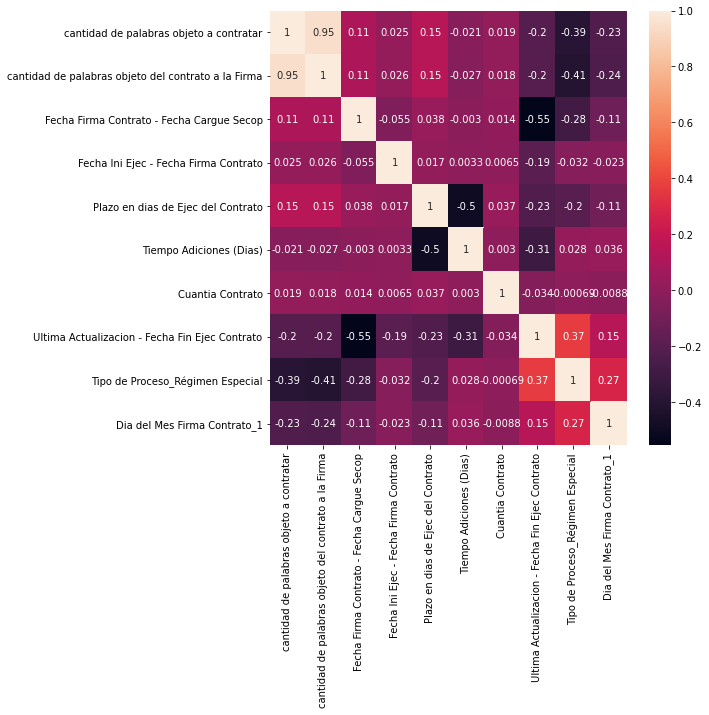

In [174]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(X_fselec.corr(),annot=True);
#plt.xticks(np.arange(8),rotation=20);

## Regresión logística

### Con todas las variables

In [175]:
# Validacion cruzada
reglog = LogisticRegression(max_iter = 500)
vc = cross_val_score(reglog, scaler.transform(X_train), y_train, cv = 5, scoring = "accuracy")
accuracy = vc.mean()
print("Accuracy para Regresión Logística con validación cruzada: {:1.4f} ".format(accuracy) )

Accuracy para Regresión Logística con validación cruzada: 0.6817 


In [176]:
reglog = LogisticRegression(max_iter=500)
reglog.fit(scaler.transform(X_train),y_train)

LogisticRegression(max_iter=500)

In [177]:
y_pred = reglog.predict(scaler.transform(X_test))
print("El accuracy del test es: {:1.4f}".format( accuracy_score(y_test, y_pred) ))
print("La sensitividad(recall) del test es: {:1.4f}".format( recall_score(y_test, y_pred) ))

El accuracy del test es: 0.6844
La sensitividad(recall) del test es: 0.6533


In [178]:
plot_CM(y_test, y_pred,norm='true')

Predicted,No,Sí
True,,
No,0.715429,0.284571
Sí,0.346700,0.653300


Model: ROC AUC = 0.763


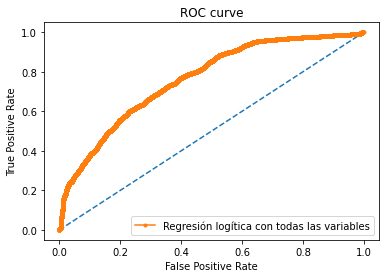

In [179]:
plot_ROC(reglog, X_test, y_test, scaler, model_name='Regresión logítica con todas las variables')

### Regresión logística con variables seleccionadas

In [180]:
regLog2, X_test2, y_test2, y_pred2, scaler2 = reg_log(X_fselec, y_down_MA)

Accuracy para Regresión Logística con validación cruzada: 0.6752 
El accuracy del test es: 0.6772
La sensitividad(recall) del test es: 0.6530


In [181]:
plot_CM(y_test2, y_pred2,norm='true')

Predicted,No,Sí
True,,
No,0.701391,0.298609
Sí,0.347007,0.652993


Model: ROC AUC = 0.764


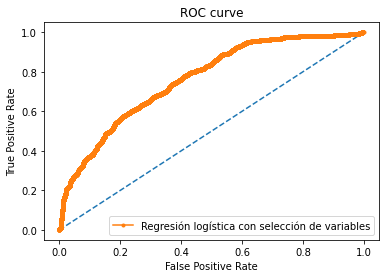

In [182]:
plot_ROC(regLog2, X_test2, y_test2, scaler2, model_name='Regresión logística con selección de variables')

### Conclusión:
Tanto el accuracy como el ROC_AUC score son mejores con todas las variables comparado a cuando se seleccionan variables. Por lo tanto, conservar todas las variables es lo mejor para la regresión logística.

## Bosque aleatorio

In [183]:
# con variables seleccionadas para que no tarde demasiado
X_train, X_test, y_train, y_test = train_test_split(X_fselec, y_down_MA, test_size = 0.3, random_state = 42, stratify = y_down_MA)
#scaler = preprocessing.StandardScaler().fit(X_train)

In [184]:
# Validacion cruzada
forest = RandomForestClassifier(random_state=42)
vc = cross_val_score(forest, X_train, y_train, cv = 5, scoring = "accuracy")
accuracy = vc.mean()
print("Accuracy promedio para Bosque Aleatorio con validación cruzada: {:1.4f} ".format(accuracy) )

Accuracy promedio para Bosque Aleatorio con validación cruzada: 0.9804 


In [185]:
vc

array([0.98044607, 0.97974053, 0.98053963, 0.98075115, 0.98063364])

### Con todas las variables

In [186]:
forest, X_test, y_test, y_pred_forest, scaler = random_forest(X_down_MA, y_down_MA)

Accuracy del test: 0.9815
La sensitividad(recall) del test es: 0.9705


In [187]:
plot_CM(y_test, y_pred_forest,norm="true")

Predicted,No,Sí
True,,
No,0.992366,0.007634
Sí,0.029460,0.970540


Model: ROC AUC = 0.996


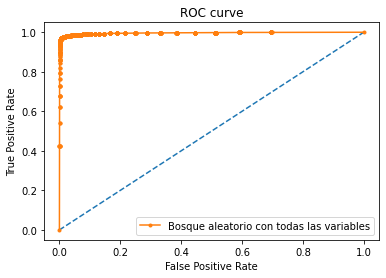

In [188]:
plot_ROC(forest, X_test, y_test, scaler, model_name='Bosque aleatorio con todas las variables')

### Con variables seleccionadas

In [189]:
# Descartando una de conteo de palabras
forest2, X_test2, y_test2, y_pred_forest2, scaler2 = random_forest(X_fselec.iloc[:,1:], y_down_MA)

Accuracy del test: 0.9807
La sensitividad(recall) del test es: 0.9691


In [190]:
plot_CM(y_test2, y_pred_forest2,norm="true")

Predicted,No,Sí
True,,
No,0.992169,0.007831
Sí,0.030864,0.969136


Model: ROC AUC = 0.996


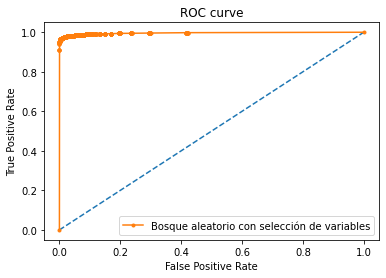

In [191]:
plot_ROC(forest2, X_test2, y_test2, scaler2, model_name='Bosque aleatorio con selección de variables')

**Nota**:Elección de hiperparametros - tarda demasiado ejecución

## Conclusión
- El **bosque aleatorio clasifica mucho mejor que la regresión logística**. Los resultados parecen correctos, teniendo en cuenta que se hizo una validación cruzada 5-fold y que el accuracy para el bosque aleatorio es en promedio igual a 0.98 mientras que con la regresión logística, el accuracy promedio es igual a 0.7 **(validar con grafica)**
- La diferencia de la precisión de los modelos entre con y sin selección de variables es mínima con Random Forest. Por lo tanto para que los modelos no se tarden ejecutando demasiado, **es mejor quedarse con las variables filtradas** **(poner listado)**
- La **elección de hiperparámetros queda pendiente** porque tarda bastante

----

# Modelos con output `Adicion en Valor`
- Se exluye la informacion acerca de adiciones excepto el target 'Adicion en Valor'.
- Se **excluye la información acerca de sanciones, es decir 'Marc Sancion y Valor Sancion'**

In [198]:
# _MA: para Marc Adiciones
df_downsampled_AV = balance(df,"Adicion en Valor")
y_down_AV = df_downsampled_AV["Adicion en Valor"]
# Eliminamos las columnas innecesarias incluyendo la del target
X_down_AV = df_downsampled_AV.drop(columns = vars_a_excluir + ["Marc Adiciones","Adicion en Valor","Adicion en Tiempo",
                                                               "Marc Sancion","Valor Total de Adiciones","Tiempo Adiciones (Dias)"])
# Pasamos a dummies las columnas que sean categoricas
X_down_AV = pd.get_dummies(data = X_down_AV, columns=list(set(vars_categoricas) - {"Marc Adiciones","Marc Sancion","Tiempo Adiciones (Dias)"}))

In [199]:
# No esta quitando Valor Sancion :(
# Variables dummies
list(X_down_AV.columns)

['cantidad de palabras objeto a contratar',
 'cantidad de palabras objeto del contrato a la Firma',
 'Fecha Firma Contrato - Fecha Cargue Secop',
 'Fecha Ini Ejec - Fecha Firma Contrato',
 'Plazo en dias de Ejec del Contrato',
 'Cuantia Contrato',
 'Valor Sancion',
 'Ultima Actualizacion - Fecha Fin Ejec Contrato',
 'Tipo de Proceso_Asociación Público Privada',
 'Tipo de Proceso_Concurso de Méritos Abierto',
 'Tipo de Proceso_Concurso de Méritos con Lista Corta',
 'Tipo de Proceso_Contratación Directa (Ley 1150 de 2007)',
 'Tipo de Proceso_Contratación Mínima Cuantía',
 'Tipo de Proceso_Contratos y convenios con más de dos partes',
 'Tipo de Proceso_Licitación Pública',
 'Tipo de Proceso_Licitación obra pública',
 'Tipo de Proceso_Régimen Especial',
 'Tipo de Proceso_Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)',
 'Tipo de Proceso_Selección Abreviada del literal h del numeral 2 del artículo 2 de la Ley 1150 de 2007',
 'Tipo de Proceso_Selección Abreviada servicios de Salud',

### Seleccion de las variables mas importantes con Random Forest

In [200]:
print("Dimension de dataset con dummies: ",X_down_AV.shape)
print("Cantidad de variables en dataset con dummies: ",X_down_AV.shape[1])

Dimension de dataset con dummies:  (283928, 208)
Cantidad de variables en dataset con dummies:  208


In [202]:
max_vars = 30
X_fselec2 = feature_selection(X_down_AV, y_down_AV, max_vars)

Variables estadísticamente significativas: 
['cantidad de palabras objeto a contratar', 'cantidad de palabras objeto del contrato a la Firma', 'Fecha Firma Contrato - Fecha Cargue Secop', 'Fecha Ini Ejec - Fecha Firma Contrato', 'Plazo en dias de Ejec del Contrato', 'Cuantia Contrato', 'Ultima Actualizacion - Fecha Fin Ejec Contrato', 'Tipo de Proceso_Contratación Directa (Ley 1150 de 2007)', 'Dpto y Muni Contratista_Bogotá D.C.', 'Dpto y Muni Contratista_Cundinamarca', 'Dia de la Semana Firma Contrato_Jueves', 'Dia de la Semana Firma Contrato_Lunes', 'Dia de la Semana Firma Contrato_Martes', 'Dia de la Semana Firma Contrato_Miércoles', 'Dia de la Semana Firma Contrato_Viernes', 'Nombre Grupo_[F] Servicios', 'Def Origen Recur_0', 'Def Origen Recur_1', 'Dia del Mes Firma Contrato_1', 'Dia del Mes Firma Contrato_11', 'Tipo de Contrato_Prestación de Servicios', 'Causal de Otras Formas de Contratacion Directa_Prestación de Servicios Profesionales y de Apoyo a la Gestión (Literal H)', 'Mes 

In [218]:
print(np.corrcoef(X_down_AV['cantidad de palabras objeto a contratar'],y_down_AV))
print(np.corrcoef(X_down_AV['cantidad de palabras objeto del contrato a la Firma'],y_down_AV))

[[1.         0.09822096]
 [0.09822096 1.        ]]
[[1.         0.09151937]
 [0.09151937 1.        ]]


##  Bosque aleatorio

In [206]:
# con variables seleccionadas para que no tarde demasiado
X_train, X_test, y_train, y_test = train_test_split(X_fselec2, y_down_AV, test_size = 0.3, random_state = 42, stratify = y_down_AV)
#scaler = preprocessing.StandardScaler().fit(X_train)

In [207]:
# Validacion cruzada
forest = RandomForestClassifier(random_state=42)
vc = cross_val_score(forest, X_train, y_train, cv = 5, scoring = "accuracy")
accuracy = vc.mean()
print("Accuracy promedio para Bosque Aleatorio con validación cruzada: {:1.4f} ".format(accuracy) )

Accuracy promedio para Bosque Aleatorio con validación cruzada: 0.9385 


In [208]:
vc

array([0.93740881, 0.93841509, 0.93823899, 0.93864151, 0.93999849])

### Con todas las variables

In [209]:
forest, X_test, y_test, y_pred_forest, scaler = random_forest(X_down_AV, y_down_AV)

Accuracy del test: 0.9185
La sensitividad(recall) del test es: 0.9031


In [210]:
plot_CM(y_test, y_pred_forest,norm="true")

Predicted,No,Sí
True,,
No,0.934022,0.065978
Sí,0.096950,0.903050


Model: ROC AUC = 0.975


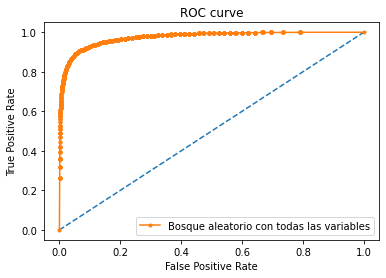

In [211]:
plot_ROC(forest, X_test, y_test, scaler, model_name='Bosque aleatorio con todas las variables')

### Con variables seleccionadas

In [213]:
# Descartando una de conteo de palabras
forest2, X_test2, y_test2, y_pred_forest2, scaler2 = random_forest(X_fselec2.iloc[:,1:], y_down_AV)

Accuracy del test: 0.9422
La sensitividad(recall) del test es: 0.9255


In [214]:
plot_CM(y_test2, y_pred_forest2,norm="true")

Predicted,No,Sí
True,,
No,0.958887,0.041113
Sí,0.074503,0.925497


Model: ROC AUC = 0.985


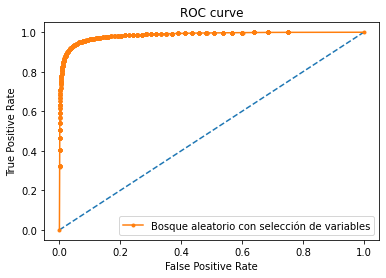

In [215]:
plot_ROC(forest2, X_test2, y_test2, scaler2, model_name='Bosque aleatorio con selección de variables')

### Conclusión